# UNAD
## Andres Camilo Ariza Vargas
## Arboles de Decisión

## Pasos de la Actividad
1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.
2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario
3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características
4. Dividir el dataset en Train y Test para evaluar correctamente el modelo
5. Entrenar el modelo configurando los diferentes hiperparámetros
6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc
7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.
8. Interpretar, analizar y documentar los resultados obtenidos.

## 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [64]:
# Se cargan las librerias necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Librerias necesarias para realizar la ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [6]:
# Lectura y almacenamiento del archivo a trabajar
Datos = pd.read_csv('./Analisis_Datos/Dataset_Arboles_de_Decision/winequality-red.csv')
# Se realiza lectura del archivo para el análisis exploratorio
Datos.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [16]:
# Descripción de los datos
Datos.describe()
# Datos.shape
# (1599, 12)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario. 

In [19]:
# Verificar valores nulos
print("Valores nulos en cada columna:\n", Datos.isnull().sum())

Valores nulos en cada columna:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


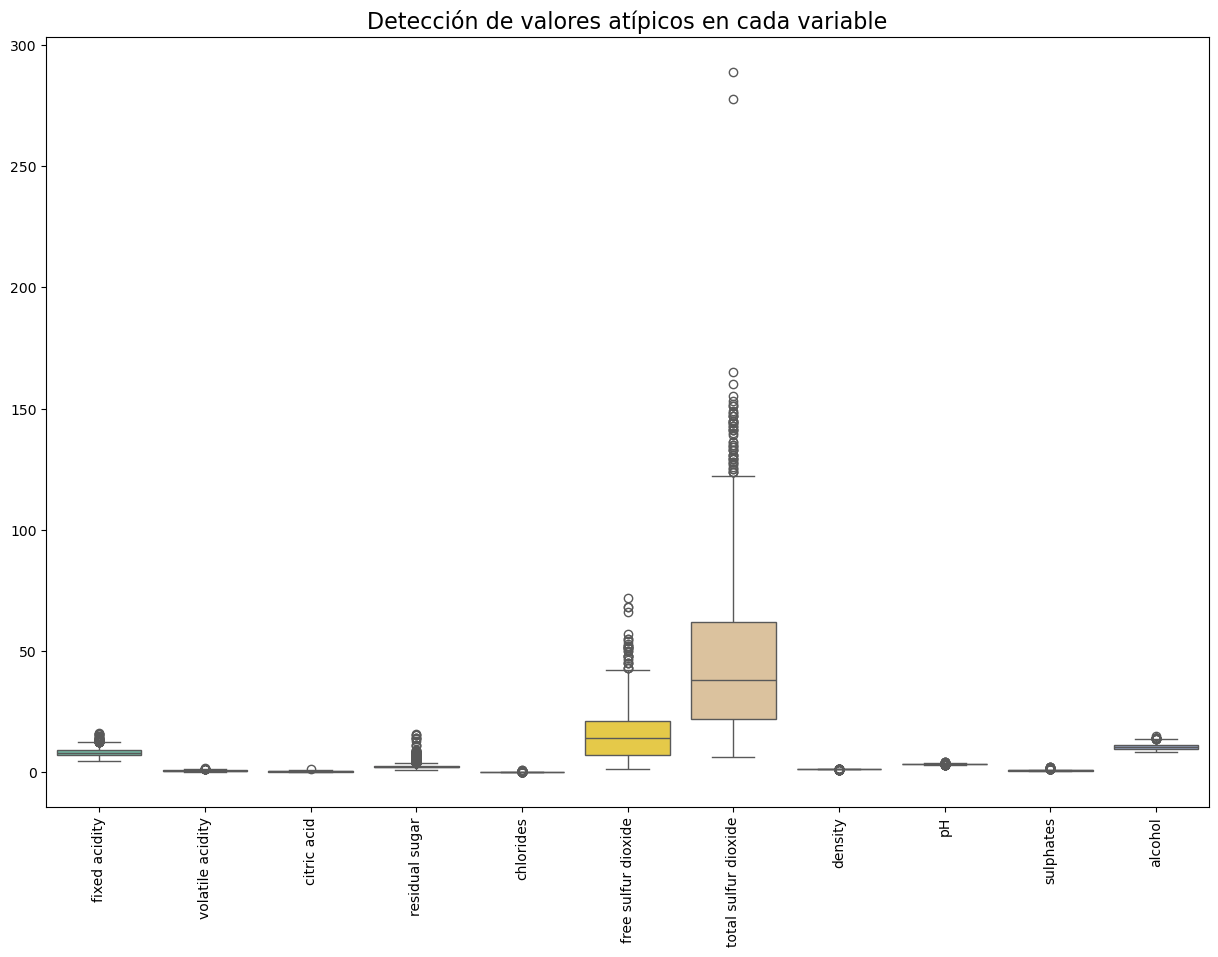

In [21]:
data_filtered = Datos.drop(columns=['quality'])

# Boxplot para identificar valores atípicos
plt.figure(figsize=(15, 10))
sns.boxplot(data=data_filtered, palette="Set2")
plt.xticks(rotation=90)
plt.title("Detección de valores atípicos en cada variable", fontsize=16)
plt.show()

In [23]:
# Definimos los límites máximos y mínimos para cada variable en función de los rangos esperados

# Parámetros de límites para identificar valores atípicos
limites = {
    'fixed acidity': (4, 14),
    'volatile acidity': (0.1, 1.2),
    'citric acid': (0, 0.6),
    'residual sugar': (0.9, 10),
    'chlorides': (0.01, 0.2),
    'free sulfur dioxide': (1, 60),
    'total sulfur dioxide': (10, 150),
    'density': (0.9900, 1.0030),
    'pH': (2.9, 3.9),
    'sulphates': (0.3, 0.9),
    'alcohol': (8, 14)
}

# Filtra el dataset según los límites establecidos y cuenta los valores atípicos
for columna, (min_val, max_val) in limites.items():
    # Contar valores atípicos antes de eliminar
    total_atipicos = ((Datos[columna] < min_val) | (Datos[columna] > max_val)).sum()
    print(f"Total de valores atípicos en {columna}: {total_atipicos}")
    
    # Filtrar el dataset para eliminar los valores fuera del rango
    Datos = Datos[(Datos[columna] >= min_val) & (Datos[columna] <= max_val)]
    
    # Verificar nuevamente si quedan valores atípicos después del filtro
    total_atipicos_restantes = ((Datos[columna] < min_val) | (Datos[columna] > max_val)).sum()
    print(f"Total de valores atípicos restantes en {columna} después del filtro: {total_atipicos_restantes}\n")

# Dataset limpio sin valores atípicos según los límites
Datos.reset_index(drop=True, inplace=True)

Total de valores atípicos en fixed acidity: 8
Total de valores atípicos restantes en fixed acidity después del filtro: 0

Total de valores atípicos en volatile acidity: 4
Total de valores atípicos restantes en volatile acidity después del filtro: 0

Total de valores atípicos en citric acid: 75
Total de valores atípicos restantes en citric acid después del filtro: 0

Total de valores atípicos en residual sugar: 10
Total de valores atípicos restantes en residual sugar después del filtro: 0

Total de valores atípicos en chlorides: 28
Total de valores atípicos restantes en chlorides después del filtro: 0

Total de valores atípicos en free sulfur dioxide: 2
Total de valores atípicos restantes en free sulfur dioxide después del filtro: 0

Total de valores atípicos en total sulfur dioxide: 35
Total de valores atípicos restantes en total sulfur dioxide después del filtro: 0

Total de valores atípicos en density: 0
Total de valores atípicos restantes en density después del filtro: 0

Total de v

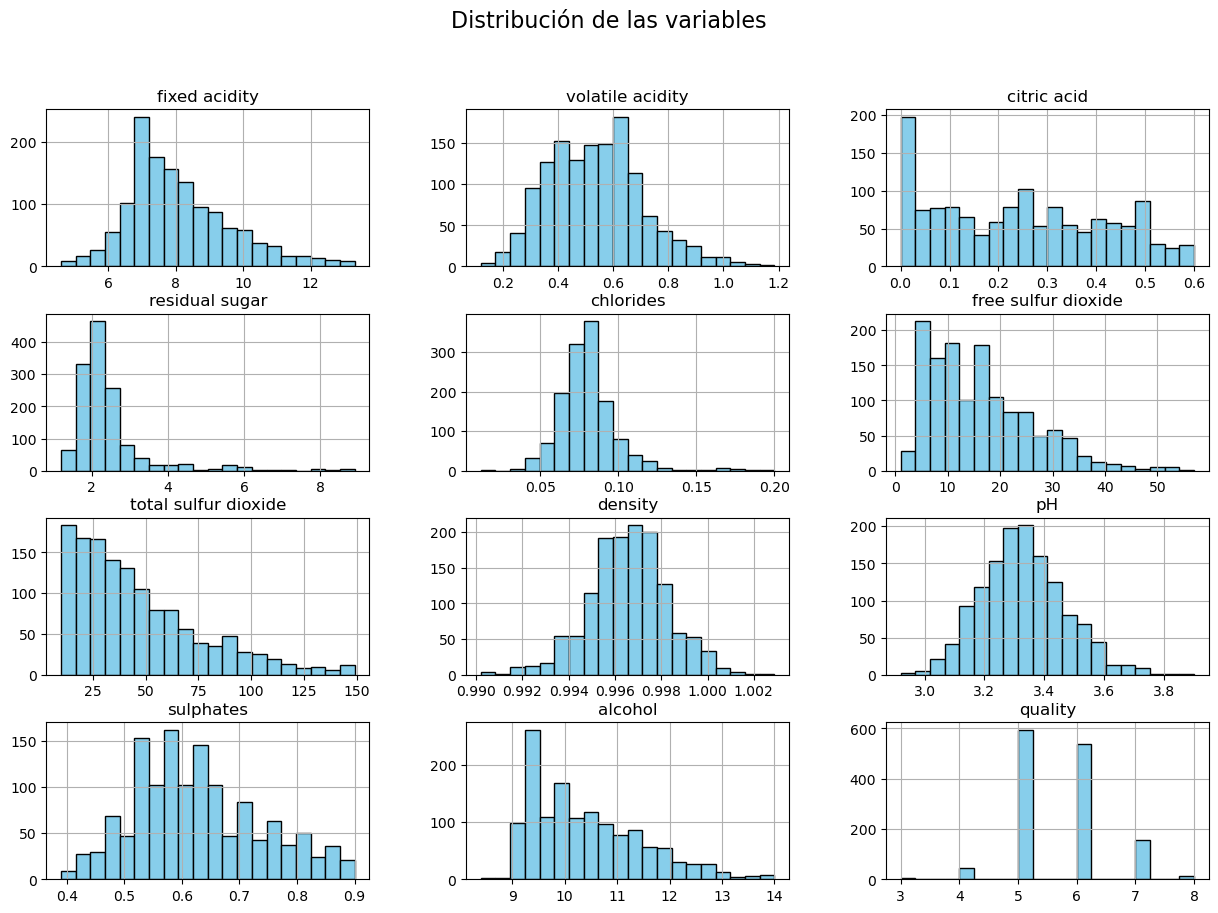

In [27]:
# Histogramas de las características
Datos.hist(bins=20, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Distribución de las variables", fontsize=16)
plt.show()

## 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características. 

Característica de interes:

- quality: Da la calidad de un vino en un rango de 0 a 10.
- Predecir la calidad del vino con base en una serie de parametros.

In [30]:
predictors_col = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]
target_col = ['quality']
predictors = Datos[predictors_col]
target = Datos[target_col]

# Correlación
corr = predictors.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.247845,0.648242,0.085069,0.179467,-0.115261,-0.073360,0.647126,-0.695175,0.175332,-0.118062
volatile acidity,-0.247845,1.000000,-0.592574,0.073604,0.153360,-0.040716,0.063846,0.057373,0.214970,-0.348364,-0.201434
citric acid,0.648242,-0.592574,1.000000,0.092122,0.033377,-0.027385,0.059188,0.309926,-0.485503,0.289017,0.089189
residual sugar,0.085069,0.073604,0.092122,1.000000,0.124544,0.076357,0.157875,0.297594,-0.055488,-0.000779,0.070663
chlorides,0.179467,0.153360,0.033377,0.124544,1.000000,-0.007091,0.079288,0.363166,-0.171432,-0.048843,-0.276055
free sulfur dioxide,-0.115261,-0.040716,-0.027385,0.076357,-0.007091,1.000000,0.639879,-0.040300,0.065773,0.068666,-0.046617
total sulfur dioxide,-0.073360,0.063846,0.059188,0.157875,0.079288,0.639879,1.000000,0.108578,-0.051588,-0.072328,-0.229781
density,0.647126,0.057373,0.309926,0.297594,0.363166,-0.040300,0.108578,1.000000,-0.321597,0.057504,-0.555529
pH,-0.695175,0.214970,-0.485503,-0.055488,-0.171432,0.065773,-0.051588,-0.321597,1.000000,0.024052,0.243494
sulphates,0.175332,-0.348364,0.289017,-0.000779,-0.048843,0.068666,-0.072328,0.057504,0.024052,1.000000,0.297466


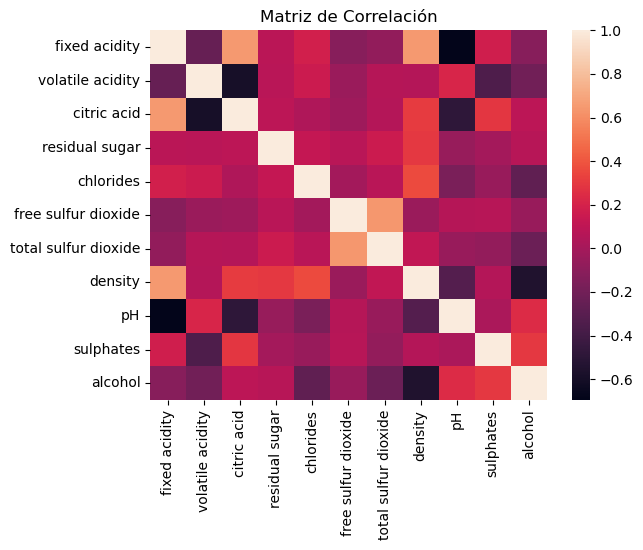

In [33]:
sns.heatmap(corr)
plt.title('Matriz de Correlación')
plt.show()

## 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo. 

In [54]:
# Paso 4: Dividir el dataset en Train y Test
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=42)

# Verificar las dimensiones de los conjuntos
print("Dimensiones del conjunto de entrenamiento:", X_train.shape, y_train.shape)
print("Dimensiones del conjunto de prueba:", X_test.shape, y_test.shape)

Dimensiones del conjunto de entrenamiento: (1082, 11) (1082, 1)
Dimensiones del conjunto de prueba: (271, 11) (271, 1)


## 5. Entrenar el modelo configurando los diferentes hiperparámetros. 

In [56]:
# Inicializa el modelo de árbol de decisión
model = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_split=10)

# Entrena el modelo
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)

## 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc. 

In [60]:
y_pred = model.predict(X_test)

# Cálculo de métricas con zero_division
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

print(f"Precisión: {accuracy:.2f}")
print(f"Precisión (weighted): {precision:.2f}")
print(f"Recall (weighted): {recall:.2f}")
print(f"F1-score (weighted): {f1:.2f}")

Precisión: 0.61
Precisión (weighted): 0.59
Recall (weighted): 0.61
F1-score (weighted): 0.60


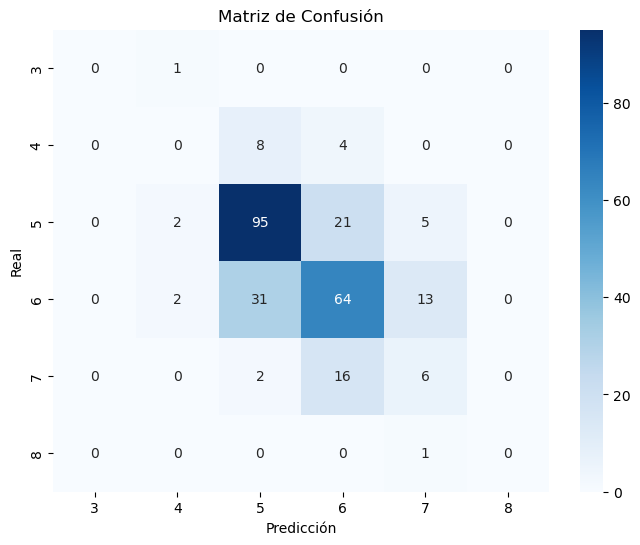

In [66]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(target), yticklabels=np.unique(target))
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

## 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

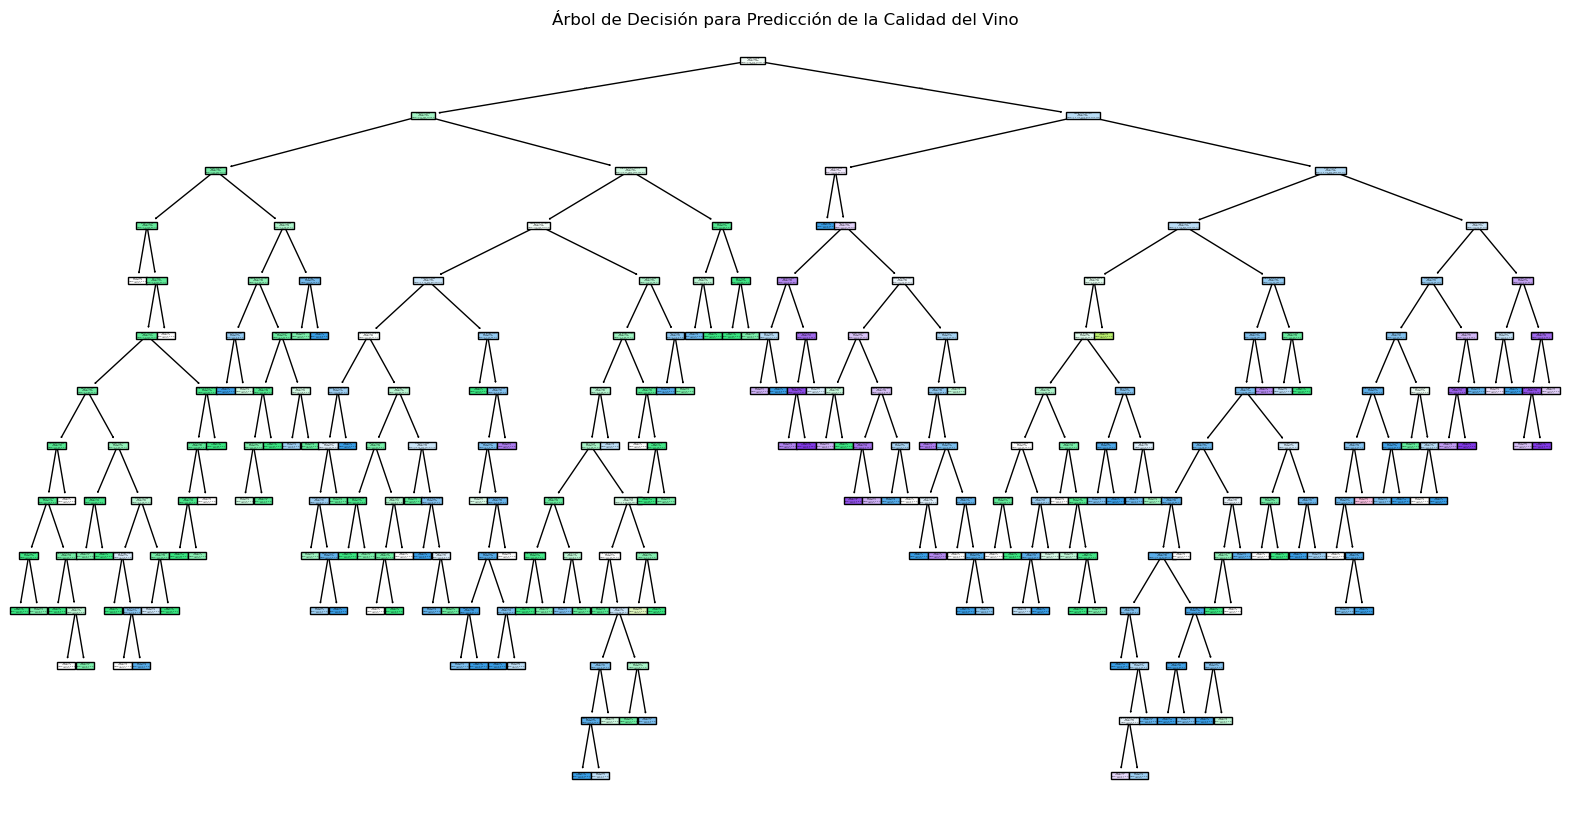

In [70]:
# Visualización del árbol de decisión entrenado con el modelo optimizado
plt.figure(figsize=(20, 10))
plot_tree(mejor_modelo, 
          feature_names=predictors_col, 
          class_names=[str(x) for x in sorted(Datos['quality'].unique())], 
          filled=True)
plt.title("Árbol de Decisión para Predicción de la Calidad del Vino")
plt.show()

## 8. Interpretar, analizar y documentar los resultados obtenidos
### Evaluación del Desempeño del Modelo
* Precisión (macro): El modelo logró una precisión de 0.61 en la clasificación de las diferentes clases de calidad de vino, lo que indica que un 61% de las predicciones hechas por el modelo son correctas. Sin embargo, la precisión ponderada es 0.59, lo que refleja cómo el modelo puede estar funcionando mejor en ciertas clases que en otras.

* Recall (macro): Con un recall ponderado de 0.61, el modelo identifica correctamente un 61% de los vinos en cada categoría de calidad. Esto sugiere una cobertura moderada del modelo en todas las clases, pero hay espacio para mejorar en aquellas clases menos frecuentes.

* F1-Score (macro): El F1-score ponderado es de 0.60, lo cual representa un balance entre precisión y recall. Dado que este modelo presenta un F1 moderado, podríamos considerar ajustes adicionales para optimizar la clasificación de la calidad de vinos, especialmente en clases de calidad baja o alta que podrían estar sub-representadas.

### Análisis de la Matriz de Confusión
La matriz de confusión muestra la predicción de la calidad del vino en una escala de 3 a 8 (en el eje "Predicción" y "Real"):

* Clase 4 (Calidad real): De los vinos de calidad 4, 8 fueron clasificados correctamente. Sin embargo, 4 fueron clasificados como 5 y 2 como 6, lo que muestra dificultad para diferenciar esta clase de las calidades superiores.

* Clase 5 (Calidad real): Es la clase que el modelo predijo con mayor precisión. Se observa que de los vinos de calidad 5, 95 fueron correctamente clasificados como 5, mientras que algunos fueron clasificados incorrectamente como 4, 6 o 7.

* Clase 6 (Calidad real): Hay 64 instancias correctamente clasificadas como 6. Sin embargo, también hay una cantidad considerable de errores, con 31 casos clasificados erróneamente como 5 y 13 como 7, indicando que el modelo confunde frecuentemente la calidad 6 con las clases adyacentes.

* Clase 7 (Calidad real): Hay 16 predicciones correctas para la calidad 7, pero el modelo confundió otros casos, clasificándolos como 5 y 6, lo que sugiere que podría beneficiarse de un ajuste en las características para esta clase en particular.

* Clase 3 y 8 (Calidades reales): Estas clases no tienen muchas instancias correctamente clasificadas, con un solo caso de calidad 3 y calidad 8 respectivamente. Esto indica que el modelo tiene problemas para distinguir estas calidades extremas y, debido a la baja frecuencia de estas clases, puede que no haya suficiente representación en el conjunto de datos de entrenamiento.